-----------
Initializing structure...
time for choose_chunkdivision = 0.000802994 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (0.766044,0.642788,0), (-0.642788,0.766044,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 1.1744 s
-----------
MPB solved for frequency_1(0.306418,0.257115,0) = 0.142756 after 21 iters
MPB solved for frequency_1(0.326392,0.273876,0) = 0.149991 after 7 iters
MPB solved for frequency_1(0.326418,0.273897,0) = 0.15 after 4 iters
MPB solved for frequency_1(0.326418,0.273897,0) = 0.15 after 1 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 7.91/100.0 = 7.9% done in 4.0s, 46.6s to go
on time step 791 (time=7.91), 0.00505802 s/step
Meep progress: 15.36/100.0 = 15.4% done in 8.0s, 44.1s to go
on time step 1537 (time=15.37), 0.00536888 s/step
Meep progress: 23.580000000000002/100.0 = 23.6% done in 12.0s, 38.9s to go
on time step 2359 (time=23.59), 0.00486782 s/step
Meep progress: 31.8/100.0 = 31.8% done in 16.0s, 34.3s to go
on time step 3181 (time=31.81), 0.0048666 s/step
Meep progress: 40.02/100.0 = 40.0% done in 20.0s, 30.0s to go
on time step 4003 (time=40.03), 0.00486994 s/step
Meep progress: 48.120000000000005/100.0 = 48.1% done in 24.0s, 25.9s to go
on time step 4813 (time=48.13), 0.0049408 s/step
Meep progress: 56.36/100.0 = 56.4% done in 28.0s, 21.7s to go
on time step 5637 (time=56.37), 0.00485743 s/step
Meep progress: 64.57000000000001/100.0 = 64.6% done in 32.0s, 17.6s to go
on time step 6458 (time=64.58), 0.00487247 s/step
Meep progress: 72.82000000000001/100.0 = 72.8% done in 36.0s, 13.4s to go
o

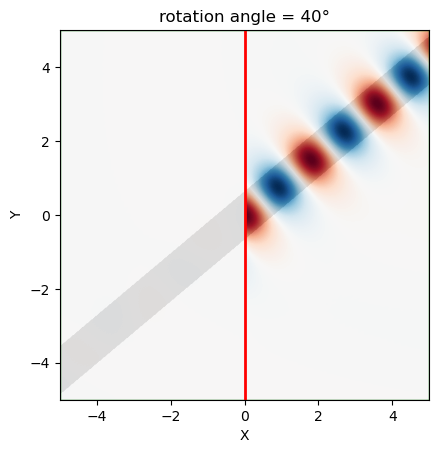

In [2]:
import meep as mp
import numpy as np
# import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt

resolution = 50 # pixels/μm                                                                                                                                                                   

cell_size = mp.Vector3(14,14)

pml_layers = [mp.PML(thickness=2)]

# rotation angle (in degrees) of waveguide, counter clockwise (CCW) around z-axis                                                                                                             
rot_angle = np.radians(40)

w = 1.0 # width of waveguide                                                                                                                                                                  

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     e1=mp.Vector3(1).rotate(mp.Vector3(z=1), rot_angle),
                     e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), rot_angle),
                     material=mp.Medium(epsilon=12))]

fsrc = 0.15 # frequency of eigenmode or constant-amplitude source                                                                                                                             
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode                                                                                                                        
bnum = 1    # band number of eigenmode                                                                                                                                                        

kpoint = mp.Vector3(kx).rotate(mp.Vector3(z=1), rot_angle)

compute_flux = False # compute flux (True) or plot the field profile (False)                                                                                                                   

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
                              center=mp.Vector3(0),
                              size=mp.Vector3(y=14),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_match_freq=True)]

sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry)

if compute_flux:
    tran = sim.add_flux(fsrc, 0, 1, mp.FluxRegion(center=mp.Vector3(x=5), size=mp.Vector3(y=10)) if rot_angle < np.pi/4 else mp.FluxRegion(center=mp.Vector3(y=5), size=mp.Vector3(10)))
    sim.run(until_after_sources=50)
    res = sim.get_eigenmode_coefficients(tran,
                                         [1],
                                         direction=mp.NO_DIRECTION,
                                         kpoint_func=lambda f,n: kpoint)
    print("flux:, {:.6f}, {:.6f}".format(mp.get_fluxes(tran)[0],abs(res.alpha[0,0,0])**2))
else:
    sim.run(until=100)
    sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10)),
               fields=mp.Ez,
               field_parameters={'alpha':0.9})
    plt.title("rotation angle = {}°".format(int(np.ceil(np.degrees(rot_angle)))))

    plt.show()

    # plt.savefig("oblique_rotangle{}.png".format(int(np.ceil(np.degrees(rot_angle)))))